In [69]:
import numpy as np
from numpy.random import randn
from scipy import stats as stats
import mne
import matplotlib.pyplot as plt
import argparse
from mne.channels import find_ch_adjacency
from mne.stats import combine_adjacency, spatio_temporal_cluster_test
from mne.viz import plot_compare_evokeds
from mne.epochs import equalize_epoch_counts
from mne.minimum_norm import apply_inverse, read_inverse_operator
from mne.stats import spatio_temporal_cluster_1samp_test, summarize_clusters_stc
from mpl_toolkits.axes_grid1 import ImageGrid, inset_locator, make_axes_locatable

In [70]:
subs = ['R3250', 'R3254', 'R3261', 'R3264', 'R3270','R3271','R3272','R3273','R3275','R3277','R3279','R3285','R3286','R3289','R3290']

ident_prod_evokeds = []
unrel_prod_evokeds = []
ident_comp_evokeds = []
unrel_comp_evokeds = []

#Load the evoked data to arrays by condition
for sub in subs:
    directory = '/Users/admin/Box Sync/Starling/Experiment1/MEG_data/' + sub + '/'
    tmin=0.3
    tmax=0.7

    #Load all epoched data
    prod_fname = directory + sub + '_prod_TEST-epo.fif'
    epochs_prod = mne.read_epochs(prod_fname, preload =True)
    comp_fname = directory + sub + '_comp_TEST-epo.fif'
    epochs_comp = mne.read_epochs(comp_fname, preload = True)

    ident_prod = epochs_prod['production identical']
    unrel_prod = epochs_prod['production unrelated']
    ident_comp = epochs_comp['comprehension identical']
    unrel_comp = epochs_comp['comprehension unrelated']

    mne.epochs.equalize_epoch_counts([ident_prod, unrel_prod, ident_comp, unrel_comp], method = 'random')

    ident_prod_evokeds.append(ident_prod.average(picks='mag').filter(l_freq=0, h_freq=40))
    unrel_prod_evokeds.append(unrel_prod.average(picks='mag').filter(l_freq=0, h_freq=40))
    ident_comp_evokeds.append(ident_comp.average(picks='mag').filter(l_freq=0, h_freq=40))
    unrel_comp_evokeds.append(unrel_comp.average(picks='mag').filter(l_freq=0, h_freq=40))


#Grand average the evoked data (for plotting)
ident_prod_ga = mne.grand_average(ident_prod_evokeds)
unrel_prod_ga = mne.grand_average(unrel_prod_evokeds)
ident_comp_ga = mne.grand_average(ident_comp_evokeds)
unrel_comp_ga = mne.grand_average(unrel_comp_evokeds)


# PRODUCTION
#Conduct the test for production, with test only run for tmin to tmax time window
prod_ident_data = np.stack([x.get_data(picks='mag', tmin=tmin, tmax=tmax) for x in ident_prod_evokeds], axis=0)
prod_unrel_data = np.stack([x.get_data(picks='mag', tmin=tmin, tmax=tmax) for x in unrel_prod_evokeds], axis=0)

del ident_prod_evokeds, unrel_prod_evokeds

#X shape: (# of conditions, # of trials/subjects, # of timepoints, # of channels)
X = np.stack([prod_ident_data, prod_unrel_data])
X = [np.transpose(x, (0,2,1)) for x in X]

#Load a sample epoch from a single subject to compute adjacency matrix
# prod_fname = '/Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3250/R3250_prod_TEST-epo.fif'
# sample_prod = mne.read_epochs(prod_fname, preload=True)
#REPLACED SAMPLE_PROD WITH IDENT_PROD_GA

adjacency, ch_names = find_ch_adjacency(ident_prod_ga.info, ch_type = 'mag')

Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3250/R3250_prod_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
97 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3250/R3250_comp_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
100 matching events found
No baseline correction applied
Created an SSP operator (subspace dim

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s



Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3254/R3254_prod_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 156) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 156) active
    Found the data of interest:


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
93 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3254/R3254_comp_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
100 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Dropped 3 epochs: 5, 13, 25
Dropped 0 epochs: 
Dropped 5 epochs: 0, 19, 23, 36, 39
Dropped 5 epochs: 15, 17, 18, 40, 45
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, no

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3261/R3261_prod_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Not setting metadata
91 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3261/R3261_comp_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
100 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Dropped 3 epochs: 10, 17, 45
Dropped 0 epochs: 
Dropped 6 epochs: 4, 9, 15, 24, 29, 40
Dropped 6 epochs: 0, 15, 23, 26, 29, 37
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3264/R3264_prod_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 156) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 156) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Not setting metadata
87 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3264/R3264_comp_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
100 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Dropped 1 epoch: 17
Dropped 0 epochs: 
Dropped 7 epochs: 33, 34, 41, 43, 46, 47, 49
Dropped 7 epochs: 7, 15, 22, 28, 30, 33, 43
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hammin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3270/R3270_prod_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 153) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 153) active
    Found the data of interest:


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
96 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3270/R3270_comp_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
150 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Dropped 0 epochs: 
Dropped 4 epochs: 5, 18, 20, 25
Dropped 16 epochs: 0, 8, 12, 13, 14, 18, 20, 21, 22, 23, 24, 26, 30, 36, 44, 45
Dropped 16 epochs: 1, 7, 9, 14, 18, 19, 20, 21, 24, 35, 37, 41, 43, 44, 47, 48
Setting up low-pass filter 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3271/R3271_prod_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:


[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
119 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3271/R3271_comp_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
150 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Dropped 1 epoch: 27
Dropped 0 epochs: 
Dropped 7 epochs: 2, 6, 15, 23, 30, 38, 46
Dropped 7 epochs: 5, 18, 29, 30, 34, 41, 49
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-ph

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3272/R3272_prod_TEST-epo.fif ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
112 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3272/R3272_comp_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
150 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Dropped 9 epochs: 0, 9, 11, 15, 24, 28, 29, 42, 45
D

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3273/R3273_prod_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
117 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3273/R3273_comp_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
150 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Dropped 2 epochs: 27, 32
Dropped 0 epochs: 
Dropped 9 epochs: 8, 14, 16, 17, 21, 24, 34, 45, 48
Dropped 9 epochs: 7, 8, 10, 11, 13, 22, 29, 38, 39
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3275/R3275_prod_TEST-epo.fif ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 156) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 156) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
127 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3275/R3275_comp_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
150 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Dropped 0 epochs: 
Dropped 5 epochs: 8, 12, 15, 16, 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3277/R3277_prod_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Not setting metadata
117 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3277/R3277_comp_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
150 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Dropped 6 epochs: 5, 6, 12, 14, 40, 42
Dropped 0 epochs: 
Dropped 13 epochs: 0, 6, 10, 11, 12, 15, 22, 24, 25, 31, 36, 44, 49
Dropped 13 epochs: 1, 9, 18, 20, 25, 27, 34, 35, 36, 37, 41, 44, 45
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal low

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3279/R3279_prod_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 156) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 156) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Not setting metadata
120 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3279/R3279_comp_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
150 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Dropped 2 epochs: 13, 15
Dropped 0 epochs: 
Dropped 9 epochs: 21, 22, 24, 30, 34, 38, 39, 41, 48
Dropped 9 epochs: 0, 10, 17, 24, 33, 36, 37, 39, 45
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.2s


- Filter length: 331 samples (0.331 s)

Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3285/R3285_prod_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Not setting metadata
107 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3285/R3285_comp_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
150 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Dropped 25 epochs: 0, 1, 2, 4, 7, 8, 10, 11, 14, 15, 16, 18, 19, 20, 23, 24, 25, 27, 31, 32, 34, 35, 40, 45, 46
Dropped 0 epochs: 
Dropped 27 epochs: 0, 8, 10, 12, 13, 15, 20, 21, 22, 23, 25, 26, 28, 30, 31, 34, 35, 37, 39, 40, 41, 42, 44, 45, 47, 48, 49
Dropped 27 epochs: 0, 5, 6, 7, 8, 9, 13, 14, 16, 17, 18, 19, 21, 22,

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3286/R3286_prod_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 156) active


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s


        axial-Raw-0.000-120.000-PCA-02 (1 x 156) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
118 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3286/R3286_comp_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
150 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Dropped 16 epochs: 4, 6, 7, 13, 22, 24, 29, 30, 32, 33, 34, 36, 38, 43, 45, 47
Dropped 0 epochs: 
Dropped 17 epochs: 1, 9, 10, 11, 13, 16, 20, 21, 2

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)



[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3289/R3289_prod_TEST-epo.fif ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 156) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 156) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
120 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3289/R3289_comp_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
150 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Dropped 15 epochs: 2, 4, 9, 14, 17, 21, 22, 24, 29, 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3290/R3290_prod_TEST-epo.fif ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 156) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 156) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
113 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Reading /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3290/R3290_comp_TEST-epo.fif ...
    Read a total of 2 projection items:
        axial-Raw-0.000-120.000-PCA-01 (1 x 155) active
        axial-Raw-0.000-120.000-PCA-02 (1 x 155) active
    Found the data of interest:
        t =    -300.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
150 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Dropped 20 epochs: 0, 1, 4, 6, 8, 10, 14, 15, 18, 21

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)

Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Reading adjacency matrix for KIT-UMD-4.


In [71]:
# RUNNING THE TEST
#Set parameters
tail = 1
alpha_cluster_forming = 0.05
n_conditions = 2
n_observations = len(X[0])
dfn = n_conditions - 1
dfd = n_observations - n_conditions
f_thresh = stats.f.ppf(1-alpha_cluster_forming, dfn=dfn, dfd=dfd)

#Run test
cluster_stats = spatio_temporal_cluster_test(X, n_permutations=1000, threshold=f_thresh, tail=tail,
                                                 adjacency=adjacency) #, step_down_p=0.1
F_obs, clusters, p_values, _ = cluster_stats
print(p_values)

stat_fun(H1): min=1.859081045506644e-11 max=13.148038842496032
Running initial clustering …
Found 16 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.759 0.208 1.    0.93  0.997 0.997 0.615 1.    0.936 0.997 0.997 1.
 0.996 0.997 0.877 0.972]


In [72]:
p_accept = 0.5
good_cluster_inds = np.where(p_values < p_accept)[0]
print(good_cluster_inds)

[1]


combining channels using RMS (mag channels)
combining channels using RMS (mag channels)


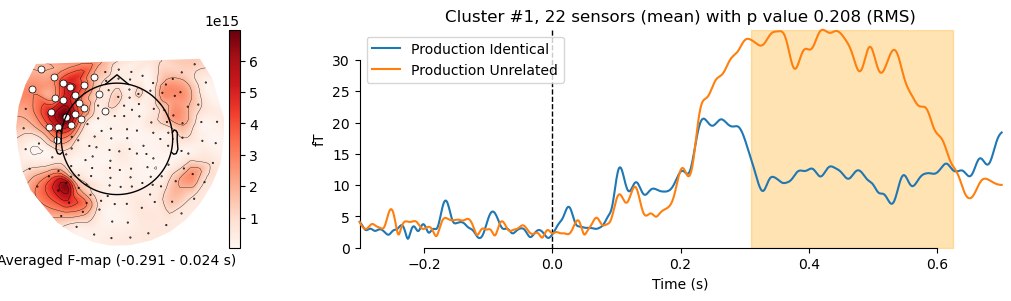

In [76]:
evokeds = {"Production Identical": ident_prod_ga, "Production Unrelated": unrel_prod_ga}

#Plot "significant" clusters (< p_accept)
for i_clu, clu_idx in enumerate(good_cluster_inds):
    #obtain indeces
    time_inds, space_inds = np.squeeze(clusters[clu_idx])
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)
    f_map = F_obs[time_inds, ...].mean(axis=0)
    sig_times = ident_prod_ga.times[time_inds]

    # sig_times = ident_prod_ga.times[time_inds + 600]

    mask = np.zeros((f_map.shape[0], 1), dtype=bool)
    mask[ch_inds, :] = True  # ADDED
    fig, ax_topo = plt.subplots(1, 1, figsize=(10, 3), layout='constrained')
    # epochs_prod_temp = ident_prod_ga.pick(picks='mag')

    #Plot topographic map of F values
    f_evoked = mne.EvokedArray(f_map[:, np.newaxis], ident_prod_ga.pick(picks='mag').info, tmin=0)
    f_evoked.plot_topomap(
        times=0,
        mask=mask,
        axes=ax_topo,
        cmap='Reds',
        vlim=(np.min, np.max),
        show=False,
        colorbar=False,
        mask_params = dict(markersize=10)  # ADDED
    )
    image = ax_topo.images[0]
    ax_topo.set_title("")
    # create additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)
    # add axes for colorbar
    ax_colorbar = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_topo.set_xlabel(
        "Averaged F-map ({:0.3f} - {:0.3f} s)".format(*sig_times[[0, -1]])
    )

    #Plot timecourse of significant cluster
    ax_signals = divider.append_axes("right", size="300%", pad=1.2)
    title = f"Cluster #{i_clu + 1}, {len(ch_inds)} sensor"
    if len(ch_inds) > 1:
        title += "s (mean) with p value " + str(p_values[clu_idx])
    plot_compare_evokeds(
        evokeds,
        title=title,
        picks=ch_inds,
        axes=ax_signals,
        show=False,
        split_legend=True,
        truncate_yaxis="auto",
    )
    # plot temporal cluster extent
    ymin, ymax = ax_signals.get_ylim()
    ax_signals.fill_betweenx(
        # (ymin, ymax), sig_times[0], sig_times[-1], color="orange", alpha=0.3
        (ymin, ymax), sig_times[0]+.3+tmin, sig_times[-1]+.3+tmin, color="orange", alpha=0.3

    )
plt.show()

In [75]:
ch_names

[np.str_('MEG 001'),
 np.str_('MEG 002'),
 np.str_('MEG 003'),
 np.str_('MEG 004'),
 np.str_('MEG 005'),
 np.str_('MEG 006'),
 np.str_('MEG 007'),
 np.str_('MEG 008'),
 np.str_('MEG 009'),
 np.str_('MEG 010'),
 np.str_('MEG 011'),
 np.str_('MEG 012'),
 np.str_('MEG 013'),
 np.str_('MEG 014'),
 np.str_('MEG 015'),
 np.str_('MEG 016'),
 np.str_('MEG 017'),
 np.str_('MEG 018'),
 np.str_('MEG 019'),
 np.str_('MEG 020'),
 np.str_('MEG 021'),
 np.str_('MEG 022'),
 np.str_('MEG 023'),
 np.str_('MEG 024'),
 np.str_('MEG 025'),
 np.str_('MEG 026'),
 np.str_('MEG 027'),
 np.str_('MEG 028'),
 np.str_('MEG 029'),
 np.str_('MEG 030'),
 np.str_('MEG 031'),
 np.str_('MEG 032'),
 np.str_('MEG 033'),
 np.str_('MEG 034'),
 np.str_('MEG 035'),
 np.str_('MEG 036'),
 np.str_('MEG 037'),
 np.str_('MEG 038'),
 np.str_('MEG 039'),
 np.str_('MEG 040'),
 np.str_('MEG 041'),
 np.str_('MEG 042'),
 np.str_('MEG 043'),
 np.str_('MEG 044'),
 np.str_('MEG 045'),
 np.str_('MEG 046'),
 np.str_('MEG 047'),
 np.str_('MEG

In [64]:
sig_times

array([0.518, 0.519, 0.52 , 0.521, 0.522, 0.523, 0.524, 0.525, 0.526,
       0.527, 0.528, 0.529, 0.53 , 0.531, 0.532, 0.533, 0.534, 0.535,
       0.536, 0.537, 0.538, 0.539, 0.54 , 0.541, 0.542, 0.543, 0.544,
       0.545, 0.546, 0.547, 0.548, 0.549, 0.55 , 0.551, 0.552, 0.553,
       0.554, 0.555, 0.556, 0.557, 0.558, 0.559, 0.56 , 0.561, 0.562,
       0.563, 0.564, 0.565, 0.566, 0.567, 0.568, 0.569, 0.57 , 0.571,
       0.572, 0.573, 0.574, 0.575, 0.576, 0.577, 0.578, 0.579, 0.58 ,
       0.581, 0.582, 0.583, 0.584, 0.585, 0.586, 0.587, 0.588, 0.589,
       0.59 , 0.591, 0.592, 0.593, 0.594, 0.595, 0.596, 0.597, 0.598,
       0.599, 0.6  , 0.601, 0.602, 0.603, 0.604, 0.605, 0.606, 0.607,
       0.608, 0.609, 0.61 , 0.611, 0.612, 0.613, 0.614, 0.615, 0.616,
       0.617, 0.618, 0.619, 0.62 , 0.621, 0.622, 0.623])

In [32]:
for i_clu, clu_idx in enumerate(good_cluster_inds):
    #obtain indeces
    time_inds, space_inds = np.squeeze(clusters[clu_idx])
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)
    print(time_inds)

[218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323]


In [57]:
time_inds + 600

array([818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830,
       831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843,
       844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856,
       857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869,
       870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882,
       883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895,
       896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908,
       909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921,
       922, 923])

In [39]:
len(ident_prod_ga.times)


1001

In [56]:
# Convert ms to seconds
tmin = 0.3  # 300 ms
tmax = 0.7  # 600 ms

# Find indices where the times fall within your desired window
time_mask = (ident_prod_ga.times >= tmin) & (ident_prod_ga.times <= tmax)

# Count how many time points are in that range
num_timepoints = time_mask.sum()

print(f"Number of time points between 300–700 ms: {num_timepoints}")

Number of time points between 300–700 ms: 401


In [47]:
# Convert ms to seconds
tmin = -.3  # 300 ms
tmax = 0.3  # 600 ms

# Find indices where the times fall within your desired window
time_mask = (ident_prod_ga.times >= tmin) & (ident_prod_ga.times < tmax)

# Count how many time points are in that range
num_timepoints = time_mask.sum()

print(f"Number of time points between -300–300 ms: {num_timepoints}")

Number of time points between -300–300 ms: 600
